# Эпиполярная геометрия

## Описание задания

Эпиполярная геометрия - геометрия стереовидения. Описывает отношения между точкой и ее двумя проекциями на плоскость, то есть отношения между координатами на двух изображениях одной физической точки. Пара изображений одной сцены, снятых с разных ракурсов, называется стереопарой.

На графике ниже $x$ и $x'$ являются проекциями физической точки $X$ на плоскости изображений стереопары. $С$ и $С'$ - центры камер. Плоскость, проходящую через точки $С$, $С'$ и $X$ называют эпиполярной плоскостью, прямые $l$, $l'$, в которых эпиполярная плоскость пересекает проскости изображений - эпиполярными линиями, а точки $e$ и $e'$, в которых отрезок $СС'$ пересекает плоскости изображений - эпиполярными точками, или эпиполями. Все эпиполярные линии пересекаются в точках $e$ и $e'$ на первом и втором изображении соответственно. Множество эпиполярных плоскостей представляет собой пучок, пересекающийся по отрезку $СС'$.

Ограничение на положение соответствующих точек $x$ и $x'$, вытекающей из эпиполярной геометрии, можно сформулировать следующим образом: точка $x'$, соответствующая $x$, должна лежать на эпиполярной линии $l'$, соответствующей $x$. Это условие называется эпиполярным ограничением.

Фундаментальной матрицей $F$ называется матрица, которая для любых соответствующих точек удвлетворяет уравнению:

$$xFx' = 0$$


и по сути своей является линейным оператором, сопоставляющим каждой точке $x$ соответствующую ей эпиполярную линию $l'$.

В данном задании вам предстоит разобраться с понятиями эпиполярной геометрии и самостоятельно вычислить фундаментальную матрицу и, используя ее, построить эпиполярные линии.

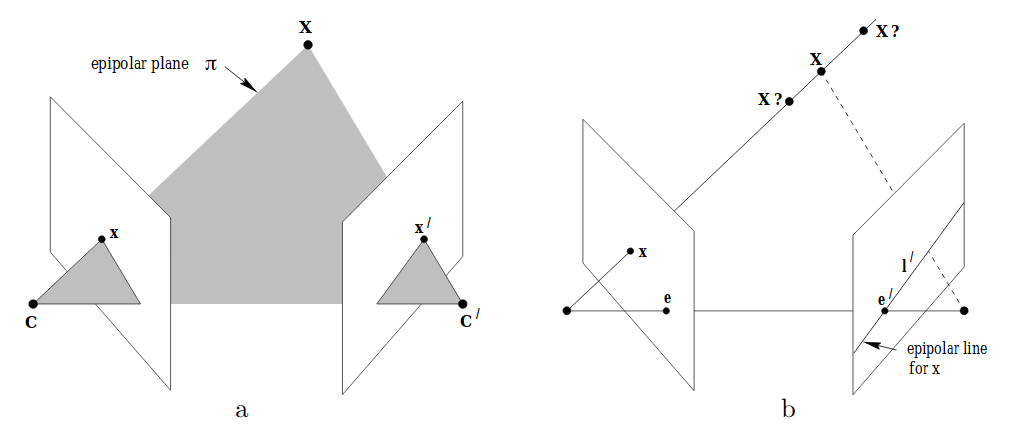

## Разметка точек

Для выполнения задания необходимо самостоятельно разметить соответствующие точки на изображениях стереопары (необходимо отметить минимум 12 точек), используя данный разметчик. 

1. В командной строке необходимо задать имена изображений, соответствия между которыми должны быть сохранены, а также имя файла, в который будут сохранены полученные точки. 
2. Далее поочередно, начиная с левого изображения, размечайте соответствия. Пока не перешли к соседнему изображению, расположение текущей точки можно поменять.
4. В текстовом выводе можно посмотреть число уже размеченных точек.
3. Для окончания работы необходимо закрыть окно виджета.

Ниже приведен пример вызова

In [48]:
!python3 ./epipolar.py -image1 ./1_test.png -image2 ./2_test.png -out ./points.npy

1 points saved
2 points saved
3 points saved
4 points saved
5 points saved
6 points saved
7 points saved
8 points saved
9 points saved
10 points saved
11 points saved
12 points saved


In [1]:
import numpy as np
import itertools

In [2]:
def get_ui(points):
            
    return points[:,0,:], points[:,1,:]

In [3]:
points_file = 'points.npy'

## 1. Фундаментальная матрица 

(2 балла)

Реализуйте функцию 

$F = u2FG( u1, u2 )$

Эта функция вычисляет "фундаментальную матрицу" $G$ по 8-ми соответствующим точкам, полученным из разметки двух изображений. Далее по матрице $G$ вычисляется фундаментальная матрица $F$, которая близка к матрице $G$ и имеет ранг $rank(F) = 2$. 

1. Матрица $G$ для каждой пары соответствующих точек $(u1_i, u2_i)$ удовлетворяет уравнению

    $$u1_i*G*u2_i = 0$$

    Поскольку матрица $G$ имеет размерность 3х3, то данное уравнение имеет 8 степеней свободы. Следовательно, для получения однозначного решения требуется не менее 8-ми ранее размеченных соответствующих точек стереопары. Получаем систему из 8-ми уравнений $A*f = 0$. Решив ее методом наименьших квадратов, получаем матрицу $G$.
    
    Подробнее о решении полученной системы уравнений можно узнать [тут](http://legacydirs.umiacs.umd.edu/~ramani/cmsc828d/lecture27.pdf).

2. Далее для понижения ранга полученной матрицы $G$ будем использовать сингулярное разложение матрицы. 

     $$u, s, vh = SVD(G)$$
    
    Для этого достаточно получить разложение матрицы $G$, в диагональной матрице сингулярных чисел $s$ обнулить последнюю строку и декомпозировать матрицу обратно. Получена фундаментальная матрица $F$. 


In [4]:
from numpy.linalg import pinv, svd

def u2FG(u1, u2):
    if u1.shape[0] < 8 or u2.shape[0] < 8:
        print ('Not enough points. Need 8 points')
        return
    
    
    #get G matrix
    A = np.array([(x * y.reshape(3, 1)).flatten() for x, y in zip(u1, u2)])
    G = np.array([*pinv(A[:, :-1]) @ A[:, -1], 1])
    #change rank
    U, s, V = svd(G.reshape(3, 3))
    s[-1] = 0              
    F = U @ np.diag(s) @ V
    return F

points = np.load(points_file)
u1, u2 = get_ui(points)
F = u2FG(u1[:8], u2[:8])
print(F)

[[-6.50545021e-06  1.73444646e-05  8.12754642e-03]
 [-1.17725139e-05 -4.96300754e-06  5.38441539e-03]
 [-3.00725843e-03 -2.73152308e-03  1.00000000e+00]]


## 2. Лучшая фундаментальная матрица
(2.5 балла)

Вычислите лучшую фундаментальную матрицу $F$, отвечающую изображениям стереопары. Для этого необходимо вычислить матрицу $F$ для каждой комбинации из 8-ми точек, полученной из 12-ти или более соответствий, и выбрать ту, что минимизирует эпиполярную ошибку. 


1. Имея матрицу $F$, вычислите эпиполярные линии
    
    $$l1_i = F'*u2_i$$
    $$l2_i = F*u1_i$$
    
    где $F'$ - $F$ транспонированная;  $l1_i$ - эпиполярная линия, представленная вектором $(A, B, C)$ уравнения прямой $Ax + By + C = 0$

2. Посчитайте эпиполярную ошибку полученной матрицы $F$. Для этого необходимо вычислить эпиполярную ошибку для каждой пары точек $(u1_i, u2_i)$ и взять от полученного множества максимум.

    Эпиполярная ошибка для каждой пары точек вычисляется, как сумма евклидового расстояния от каждой из точек до соответствующей ей эпиполярной линии 

    $$du1_i = d(u1_i, l1_i)$$
    $$du2_i = d(u2_i, l2_i)$$
    $$$$
    $$err_i = du1_i + du2_i$$
  
    
3. Сгенерируйте все возможные комбинации из 8 точек из 12 имеющихся сооветствий. Для каждой комбинации посчитайте матрицу $F$ и ее эпиполярную ошибку. Матрица $F$ с наименьшей ошибкой и является искомой матрицей $F$. 


In [5]:
def euclid_d(u, l):
    
    return (np.abs(l[:,0]*u[:,0] + l[:,1]*u[:,1] + l[:,2]))/np.sqrt((l[:,0]**2 + l[:,1]**2))

def get_epipolar_lines(u1, u2, F):
    
    #u1, u2 - np.array of shape [num_points, 3]
    #F - 3x3 fundamental matrix
    
    #l1, l2 - np.array of shape [num_points, 3]
    
    l1 = u2 @ F
    l2 = u1 @ F.T
    
    return l1, l2
    
def get_epipolar_error(u1, u2, F):
    
    #u1, u2 - np.array of shape [num_points, 3]
    #F - 3x3 fundamental matrix
    
    #errors, d_u1, d_u2 - np.array of shape [num_points, 1]
    l1, l2 = get_epipolar_lines(u1, u2, F)
    d_u1 = euclid_d(u1, l1)
    d_u2 = euclid_d(u2, l2)
    errors = d_u1 + d_u2
    
    return errors, d_u1, d_u2

points = np.load(points_file)
u1, u2 = get_ui(points)
err, d_u1, d_u2 = get_epipolar_error(u1, u2, F)
err

array([ 67.71885893, 263.74514709, 338.66922271, 469.08929824,
       598.25359887, 427.99791612, 552.81333624, 466.42446521,
       387.12557671, 509.47816206, 317.79416291, 562.45735374])

In [6]:
points = np.load(points_file)
points_set = points.tolist()
combinations = list(itertools.combinations(points_set, 8))

u1, u2 = get_ui(points)

min_error = np.infty

for comb in combinations:
    
    comb = np.asarray(comb)

    u1_comb = np.hstack([comb[:,0,:],np.ones((comb.shape[0],1))])
    u2_comb = np.hstack([comb[:,1,:],np.ones((comb.shape[0],1))])
    F = u2FG(u1_comb[:, :-1], u2_comb[:, :-1])
    error = get_epipolar_error(u1, u2, F)[0].max()
    if error < min_error:
        best_F = F
        min_error = error

print (best_F, min_error)


[[ 2.62838180e-05 -6.35153199e-04  4.68634477e-02]
 [ 6.35462324e-04 -2.25422768e-05 -1.55943701e-01]
 [-5.25893877e-02  1.43494472e-01  1.00000000e+00]] 49.63303684707685


## 3. Эпиполярные линии
(0.5 балла)

4. Для полученной матрицы $F$ постройте два графика эпиполярной ошибки, где по оси $х$ будут отмечены точки $u1_i$ и $u2_i$, а по оси $y$ - значения эпиполярной ошибки $du1_i$ и $du2_i$ соответственно. Расположите их на одном графике.

5. Визуализируйте полученные эпиполярные линии, используя код ниже.

In [7]:
get_epipolar_error(u1, u2, best_F)[0]

array([ 2.00184496, 20.82184413, 27.9402719 , 49.63303685, 17.89763467,
       26.28054988,  8.86179527, 20.22762706,  5.61947594, 34.76272944,
       11.05308802, 20.18718958])

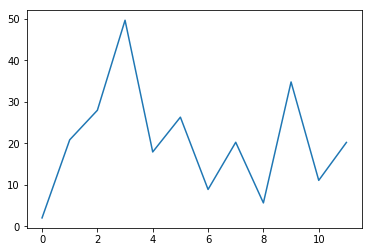

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(get_epipolar_error(u1, u2, best_F)[0])
plt.show()

In [9]:
from PIL import Image, ImageDraw

def draw_line(line, draw, size, fill=128, width=3):
    
    x1, x2 = [int(np.round((-line[2]-line[1]*y)/line[0])) for y in [0, size[1]-1]]
    y1, y2 = [int(np.round((-line[2]-line[0]*x)/line[1])) for x in [0, size[0]-1]]

    points = []
    if x1 >= 0 and x1 < size[0]:
        points.append((x1, 0))
        
    if x2 >= 0 and x2 < size[0]:
        points.append((x2, size[1]-1))
        
    if y1 >= 0 and y1 < size[1]:
        points.append((0, y1))
      
    if y2 >= 0 and y2 < size[1]:
        points.append((size[0], y2))
        
    if (len(points) >= 2):
        draw.line((points[0][0], points[0][1], points[1][0], points[1][1]), fill=fill, width=width)
        
    return draw
    
def draw_epipolar_lines_and_points(img1, img2, u1, u2, l1, l2):
    
    r = 9
    w = 4
    
    draw1 = ImageDraw.Draw(img1)
    draw2 = ImageDraw.Draw(img2)

    #Maroon, Aqua, Teal

    colors = ['red', 'blue', 'fuchsia', 'aqua', 'yellow', 'magenta', 'cyan', 'white', 'purple', 'navy', 'lime']

    for i in range(l1.shape[0]):
        
        color = colors[i%len(colors)]
        
        draw1 = draw_line(l1[i], draw1, img1.size, fill=color, width=w)
        draw1.ellipse([(u1[i,0]-r,u1[i,1]-r),(u1[i,0]+r,u1[i,1]+r)], fill=color)
        
        draw2 = draw_line(l2[i], draw2, img2.size, fill=color, width=w)
        draw2.ellipse([(u2[i,0]-r,u2[i,1]-r),(u2[i,0]+r,u2[i,1]+r)], fill=color)
        
    return img1, img2
        


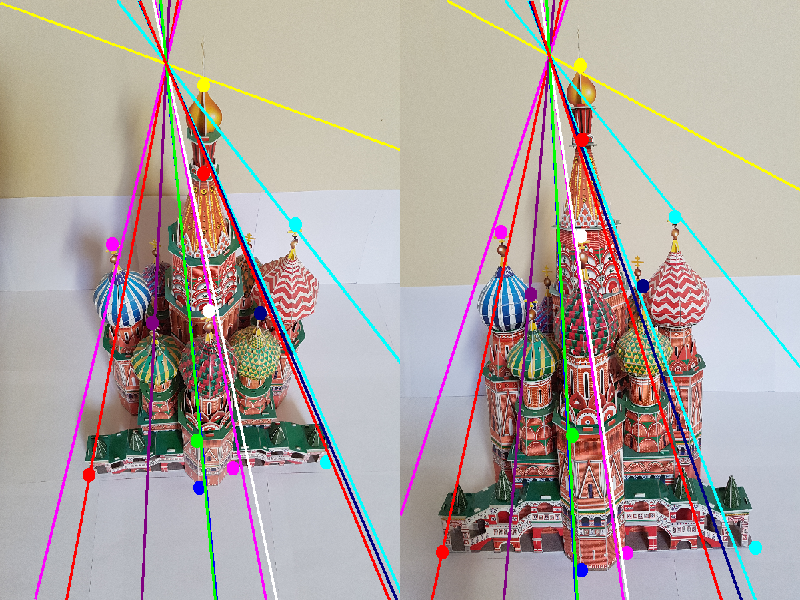

In [10]:
points = np.load(points_file)
u1, u2 = get_ui(points)

l1, l2 = get_epipolar_lines(u1, u2, best_F)

img1 = '1_test.png'
img2 = '2_test.png'

img1 = Image.open(open(img1, 'rb'))
img2 = Image.open(open(img2, 'rb'))

img1, img2 = draw_epipolar_lines_and_points(img1, img2, u1, u2, l1, l2)

h, w = 600, 400

img1 = img1.resize((w,h))
img2 = img2.resize((w,h))

img = Image.new('RGB', (w*2,h))
img.paste(img1, (0, 0))
img.paste(img2, (w, 0))

img

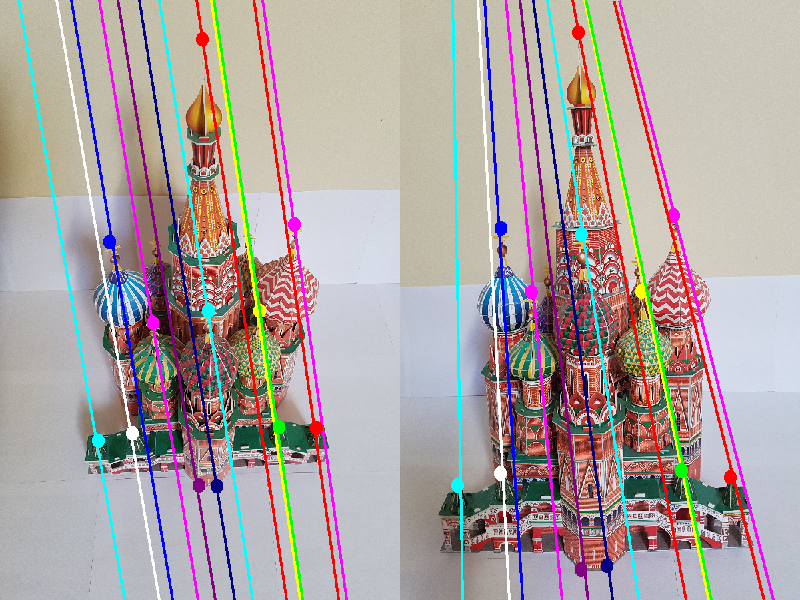

Подробнее об эпиполярной геометрии
http://masters.donntu.org/2012/iii/chigarev/library/article2.htm